
-- 日経平均 -- 
                    Open          High           Low         Close  Volume  \
Date                                                                         
2000-01-04  18937.449219  19187.609375  18937.449219  19002.859375       0   
2000-01-05  19003.509766  19003.509766  18221.820312  18542.550781       0   
2000-01-06  18574.009766  18582.740234  18168.269531  18168.269531       0   
2000-01-07  18194.050781  18285.730469  18068.099609  18193.410156       0   
2000-01-11  18246.099609  18887.560547  18246.099609  18850.919922       0   

               Adj Close  
Date                      
2000-01-04  19002.859375  
2000-01-05  18542.550781  
2000-01-06  18168.269531  
2000-01-07  18193.410156  
2000-01-11  18850.919922  

-- ドル円為替レート -- 
            DEXJPUS
DATE               
2000-01-03   101.70
2000-01-04   103.09
2000-01-05   103.77
2000-01-06   105.19
2000-01-07   105.17

-- pd.concat -- 
                   Close  DEXJPUS
2000-01-04  19002.859375   103.09
2000-01-

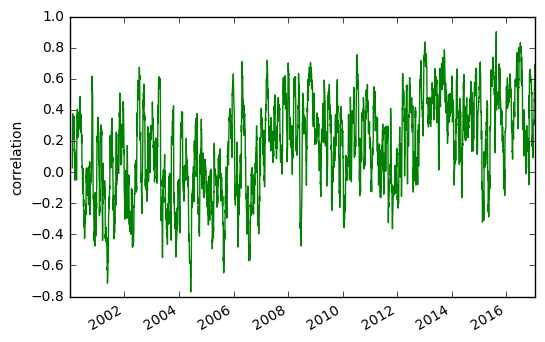

In [7]:
#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr
import pandas as pd
start = "2000/1/1"
end = "2017/1/31"

#  米国ヤフーファイナンスから、日経平均株価のデータ取得
price = pdr.DataReader("^N225", 'yahoo', start, end)
print ("\n-- 日経平均 -- ")
print (price.head())

#  ドル円の為替レートを取得 「DEXJPUS」はfredのドル円のレートの指定コード
fx = pdr.DataReader('DEXJPUS', "fred", start, end)
print ("\n-- ドル円為替レート -- ")
print (fx.head())

#  日経平均の終値と、ドル円の為替レートの表を作る。
#  dropna() : どちらかに空のレコードが有ればその業は削除
port = pd.concat([price.Close, fx], axis=1).dropna()
print ("\n-- pd.concat -- ")
print (port.head())

#  日経平均の終値価格を変化率に変換
n = port.Close.pct_change().dropna()
print ("\n-- Close.pct_change -- ")
print (n.head())

#  為替レートの価格を変化率に変換
f = port.DEXJPUS.pct_change().dropna()
print ("\n-- DEXJPUS.pct_change -- ")
print (f.head())

#  Matplotlib : 描画ライブラリ
%matplotlib inline
import matplotlib.pyplot as plt

#  20日の移動相関を計算し、グラフに表示。
f.rolling(window=20).corr(n).plot(color="green")
plt.ylabel('correlation')


In [6]:
#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr
start = "2000/1/1"
end = "2017/1/31"

#  米国ヤフーファイナンスから、日経平均株価のデータ取得
price = pdr.DataReader("^N225", 'yahoo', start, end)

#  printしてみる
print ("--- print head---")
print (price.head(1))
print ("--- print tail---")
print (price.tail(1))

#  そのまま表示
print ("---")
price.head(1)
print ("---")
price.tail(1)


--- print head---
                    Open          High           Low         Close  Volume  \
Date                                                                         
2000-01-04  18937.449219  19187.609375  18937.449219  19002.859375       0   

               Adj Close  
Date                      
2000-01-04  19002.859375  
--- print tail---
                    Open          High           Low         Close  Volume  \
Date                                                                         
2017-01-30  19371.279297  19390.970703  19295.800781  19368.849609       0   

               Adj Close  
Date                      
2017-01-30  19368.849609  
---
---


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-30,19371.279297,19390.970703,19295.800781,19368.849609,0,19368.849609


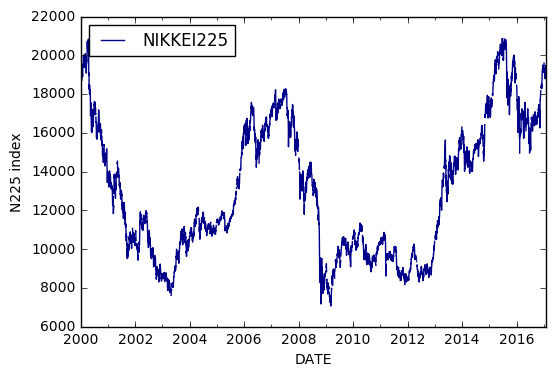

In [5]:
#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr

start = "2000/1/1"
end = "2017/1/31"

#  DataReaderを用いてFRED(セントルイス連邦準備銀行)からNikkei225の指数を取得
#  DataReader
#    http://pandas-datareader.readthedocs.io/en/latest/index.html
N225 = pdr.DataReader("NIKKEI225", 'fred', start, end)

#  Matplotlib : 描画ライブラリ
%matplotlib inline
import matplotlib.pyplot as plt

#  この位置でpandasのplotメソッドを使ってグラフを描画しないといけない
N225.plot(color='darkblue')

# y軸のラベルを「N225 index」にする
plt.ylabel('N225 index')

--- print prie ---
               Open     High      Low    Close  Volume  Adj Close
Date                                                             
1990-01-04  38922.0  38951.0  38705.0  38713.0       0    38713.0
1990-01-05  38717.0  38787.0  38091.0  38275.0       0    38275.0
1990-01-08  38332.0  38564.0  38121.0  38295.0       0    38295.0
1990-01-09  38281.0  38297.0  37730.0  37951.0       0    37951.0
1990-01-10  37928.0  37928.0  37460.0  37697.0       0    37697.0
--- print prie0 ---
               Open     High      Low    Close  Volume  Adj Close
Date                                                             
1990-01-04  38922.0  38951.0  38705.0  38713.0       0    38713.0
1990-01-05  38717.0  38787.0  38091.0  38275.0       0    38275.0
1990-01-08  38332.0  38564.0  38121.0  38295.0       0    38295.0
1990-01-09  38281.0  38297.0  37730.0  37951.0       0    37951.0
1990-01-10  37928.0  37928.0  37460.0  37697.0       0    37697.0
--- print prie1 ---
                 

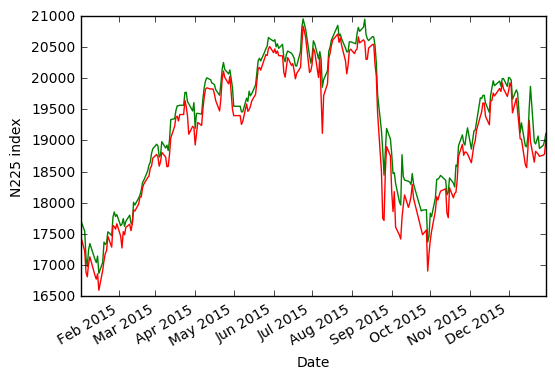

In [43]:
#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr

start = "1990/1/1"
end = "2017/1/31"

#　データをまとめて取得
price = pdr.DataReader("^N225",'yahoo',start,end)
print ("--- print prie ---")
print (price.head(5))

#　２０１５年以前のデータを取得
price0 = price.ix[:"2015"]
print ("--- print prie0 ---")
print (price0.head(5))

#　２０１５年以降、かつ0列目から２列目までを取得(OpenとHigh)
price1 = price.ix["2015",0:2]
print ("--- print prie1 ---")
print (price1.head(5))

#　２０１５年以降、かつ2列目から3列目までを取得(LowとClose)
price2 = price.ix["2015",2:3]
print ("--- print prie2 ---")
print (price2.head(5))

#Jupyterでインライン表示するために宣言
%matplotlib inline
price1.High.plot(color='green')
price2.Low.plot(color='red')

import matplotlib.pyplot as plt
plt.ylabel('N225 index')
